In [1]:
#Importing librariers

import astropy.io.fits as pyfits
from astropy.nddata import CCDData
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as scndi
from scipy.integrate import quad

# Load the data from the fits file
datafile = pyfits.open(r"C:\Users\hp\Downloads\SN2005hc (1).fits")
datafile.info()
data_cube = datafile[1].data
data_cube = data_cube[:-1]

Filename: C:\Users\hp\Downloads\SN2005hc (1).fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1319   ()      
  1  DATA          1 ImageHDU        49   (322, 326, 3682)   float32   
  2                1 ImageHDU        16   (322, 326, 3682)   float32   


In [2]:
#Extracting the info of the header files
flux= datafile[2].data
#print(flux)
datafile[2].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  322                                                  
NAXIS2  =                  326                                                  
NAXIS3  =                 3682                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
HISTORY Image was compressed by CFITSIO using scaled integer quantization:      
HISTORY   q = 4.000000 / quantized level scaling parameter                      
HISTORY 'SUBTRACTIVE_DITHER_1' / Pixel Quantization Algorithm                   
CHECKSUM= 'bpIadmIYbmIabmIY'   / HDU checksum updated 2019-04-24T21:34:47       
DATASUM = '913639248'       

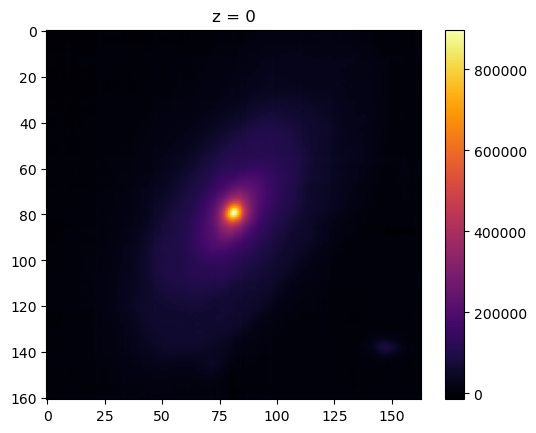

In [3]:
#Plotting the galaxy image

# Collapse the data cube along axis 0
collapsed = np.sum(data_cube, axis=0)
width, height = collapsed.shape
crop_fraction = 0.5 

# Calculate the cropping coordinates
xs = int((1 - crop_fraction) * width / 2)
ys = int((1 - crop_fraction) * height / 2)
xe = int((1 + crop_fraction) * width / 2)
ye = int((1 + crop_fraction) * height / 2)

# Perform cropping
image_cropped1 = collapsed[ys:ye, xs:xe]
plt.imshow(image_cropped1, cmap='inferno')
plt.title("z = 0")
plt.colorbar()
plt.show()
redshift=[0.3,0.8,1.3]
zhigh=0.5


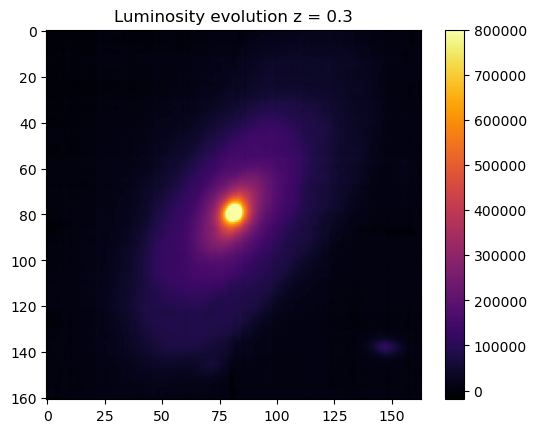

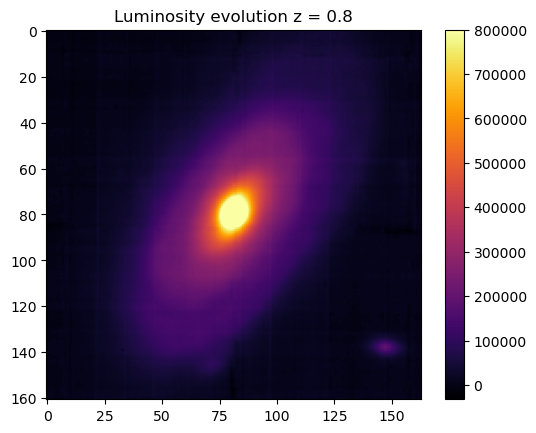

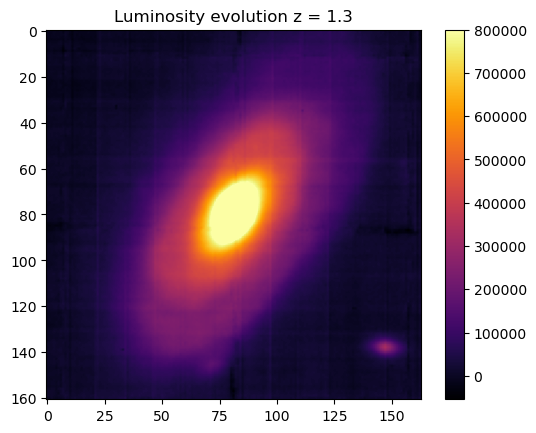

In [4]:
#Performing Luminosity Evolution to the host galaxy

def lum_evolution(zlow, zhigh, data):
    "Defined Luminosity evolution from L* of Sobral et al. 2013."
    def luminosity(z):
        logL = 0.45 * z + 41.87
        return 10 ** logL
    return (luminosity(zhigh) / luminosity(zlow))*data

for i in redshift:
    
    cube=lum_evolution(0.017, i, data_cube)
    collapsed_image = np.sum(cube, axis= 0)
    
    width, height = collapsed_image.shape
    crop_fraction = 0.5 

    # Calculate the cropping coordinates
    xs = int((1 - crop_fraction) * width / 2)
    ys = int((1 - crop_fraction) * height / 2)
    xe = int((1 + crop_fraction) * width / 2)
    ye = int((1 + crop_fraction) * height / 2)

    # Perform cropping
    image_cropped = collapsed_image[ys:ye, xs:xe]
    plt.imshow(image_cropped, cmap='inferno', vmax=800000)
    plt.title(f"Luminosity evolution z = {i}")
    plt.colorbar()
    plt.show()

3681


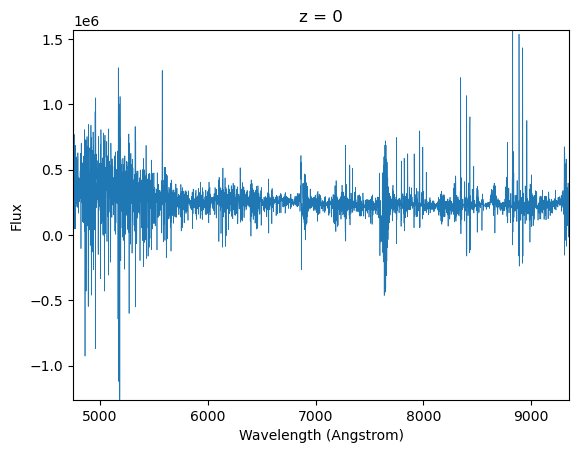

In [5]:
#Plotting the spectral graph of the host galaxy

# Get the wavelength information from the FITS header
crval3 = datafile[1].header['CRVAL3']
cd3_3 = datafile[1].header['CD3_3']
crpix3 = datafile[1].header['CRPIX3']

# Calculate the wavelength axis
wavelengths = (crval3 + (np.arange(data_cube.shape[0]) - (crpix3 - 1)) * cd3_3) * u.Angstrom

# Convert the wavelengths Quantity object to a NumPy array with no units
wavelengths = wavelengths.value
print(len(wavelengths))

# Calculate the collapsed spectrum
collapsed_spectrum = np.nansum(data_cube, axis=(1, 2))
ymin = np.min(collapsed_spectrum)
ymax = np.max(collapsed_spectrum)

# Plot the collapsed spectrum against the wavelength axis
plt.plot(wavelengths, collapsed_spectrum, linewidth=0.5)
plt.title("z = 0")
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.xlim(wavelengths[0], wavelengths[-1])
plt.ylim(ymin, ymax)
plt.show()


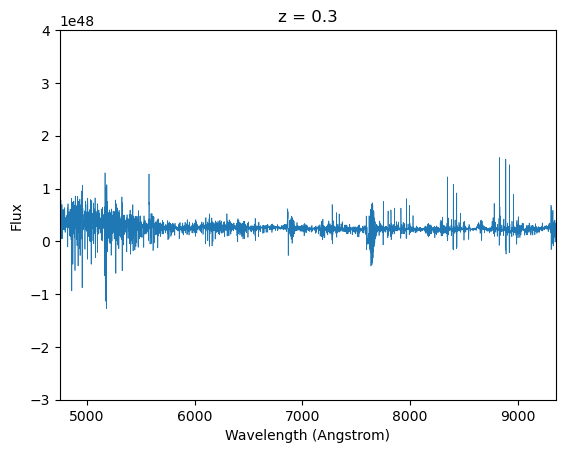

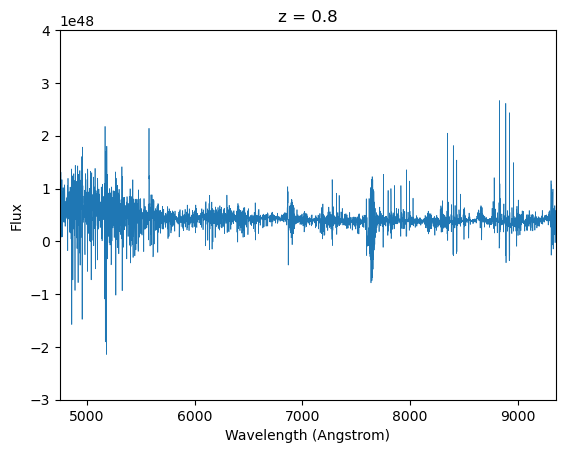

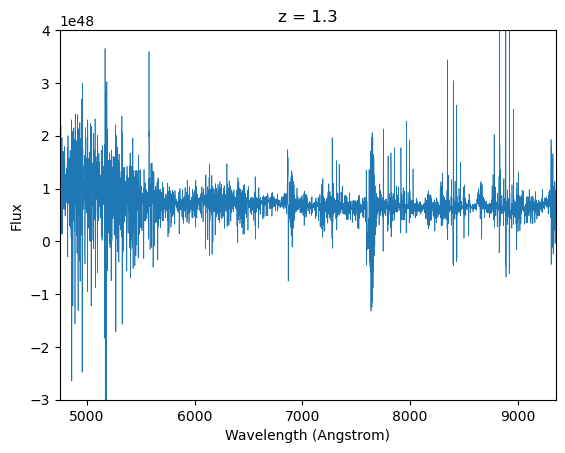

In [7]:
#Plotting the spectral graph showing luminosity evolution in host galaxy

def correcteddata(z,data_cube):
    luminosity= 10**(0.45*z + 41.87)
    data = data_cube*luminosity
    return data

for z in redshift:
    ccddata = correcteddata(z,data_cube)
    collapsed_spectrumz = np.nansum(ccddata, axis=(1, 2))


    # Plot the collapsed spectrum against the wavelength axis
    plt.plot(wavelengths, collapsed_spectrumz, linewidth=0.5)
    plt.xlabel("Wavelength (Angstrom)")
    plt.ylabel("Flux")
    plt.xlim(wavelengths[0], wavelengths[-1])
    ymin=-3e48
    ymax=4e48
    plt.ylim(ymin, ymax)
    plt.title("z = {}".format(z))
    plt.show()